<a href="https://colab.research.google.com/github/XcEland/Predicting-Probability-of-Default/blob/main/logistic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import relevant libraries

In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv('/content/drive/MyDrive/datasets/data_science_competition_2024.csv')
dataset = df.copy()

In [32]:
dataset.isna().sum()

Unnamed: 0                 0
loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

In [33]:
##drop rows based on condition
# dataset.drop(dataset[dataset.loan_amount > 75000].index, inplace=True)

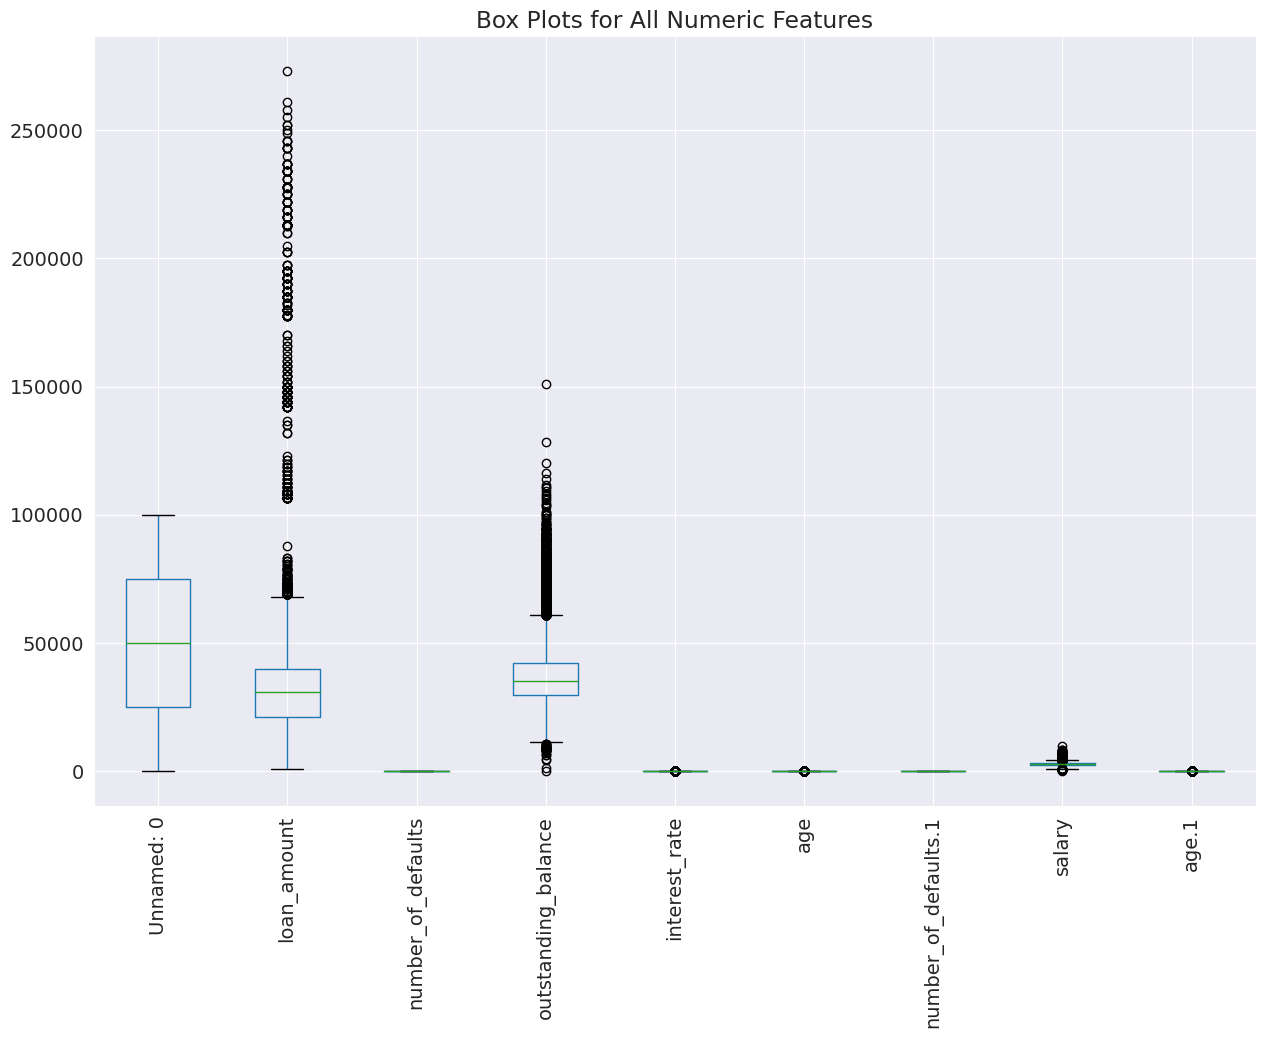

In [34]:
# Select only numeric columns
numeric_features = dataset.select_dtypes(include=[float, int])

# Create box plots for all numeric features
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
numeric_features.boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.title('Box Plots for All Numeric Features')
plt.show()

# Drop irrelevant features

In [35]:
dataset.drop(columns=['Unnamed: 0','loan_id','currency','country','age.1','number_of_defaults.1' ], inplace=True)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   disbursemet_date     100000 non-null  object 
 2   sex                  100000 non-null  object 
 3   is_employed          100000 non-null  bool   
 4   job                  95864 non-null   object 
 5   location             99405 non-null   object 
 6   loan_amount          100000 non-null  float64
 7   number_of_defaults   100000 non-null  int64  
 8   outstanding_balance  100000 non-null  float64
 9   interest_rate        100000 non-null  float64
 10  age                  100000 non-null  int64  
 11  remaining term       100000 non-null  object 
 12  salary               100000 non-null  float64
 13  marital_status       100000 non-null  object 
 14  Loan Status          100000 non-null  object 
dtypes: bool(1), float6

# Dealing with Categorical Data

In [37]:
dataset['Loan Status'] = df['Loan Status'].map({'Defaulted': 1, 'Did not default': 0})

In [38]:
dataset.head()

,gender,disbursemet_date,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,female,2022 10 29,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,0
1,other,2020 06 06,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,0
2,other,2023 09 29,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,0
3,female,2022 06 22,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,42,2246.797020,divorced,0
4,male,2023 02 08,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,45,2310.858441,married,0


In [39]:
# dealing with numerical data
dataset = dataset.select_dtypes(include=[float, int])

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amount          100000 non-null  float64
 1   number_of_defaults   100000 non-null  int64  
 2   outstanding_balance  100000 non-null  float64
 3   interest_rate        100000 non-null  float64
 4   age                  100000 non-null  int64  
 5   salary               100000 non-null  float64
 6   Loan Status          100000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 5.3 MB


# Remove outliers

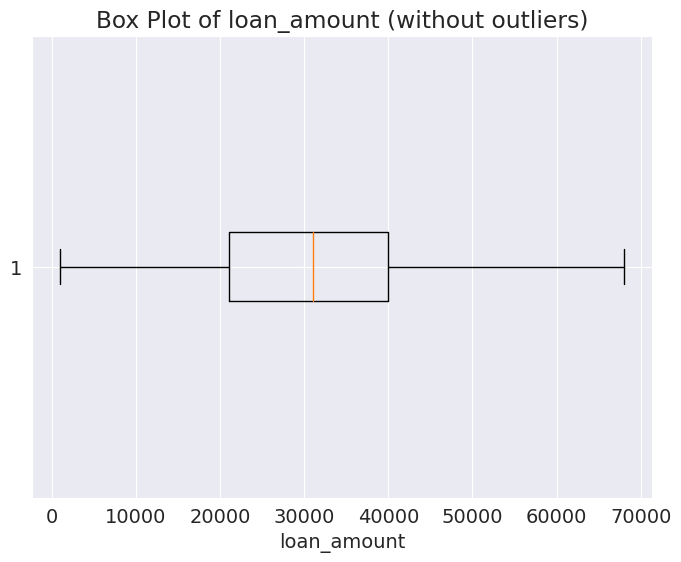

In [41]:
def remove_outliers_and_plot(dataset, feature_name, threshold=1.5):
    # Calculate quartiles and IQR
    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter outliers
    dataset = dataset[(dataset[feature_name] >= lower_bound) & (dataset[feature_name] <= upper_bound)]

    # Plot box plot without outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(dataset[feature_name], vert=False)
    plt.title(f'Box Plot of {feature_name} (without outliers)')
    plt.xlabel(feature_name)
    plt.show()

remove_outliers_and_plot(dataset, 'loan_amount')

In [42]:
sum_values = dataset[dataset['loan_amount'] > 75000].shape[0]
print("Sum of target values greater than 50000:", sum_values)

Sum of target values greater than 50000: 315


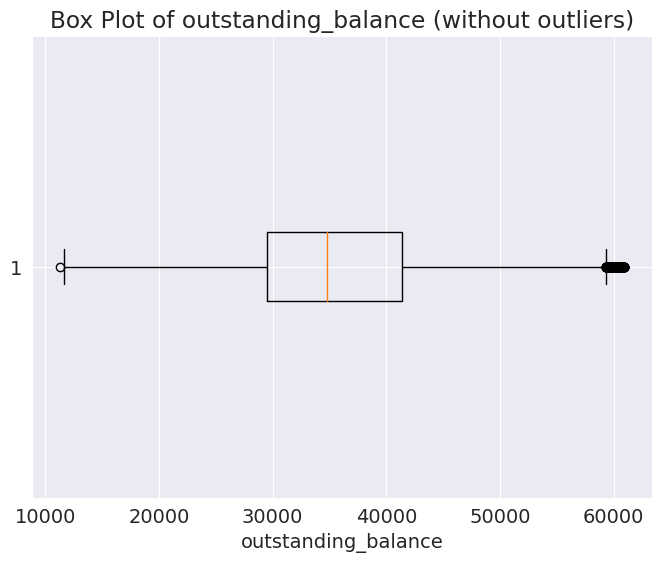

In [43]:
remove_outliers_and_plot(dataset, 'outstanding_balance')

In [44]:
sum_values = dataset[dataset['outstanding_balance'] > 58000].shape[0]
print("Sum of target values greater than 50000:", sum_values)

Sum of target values greater than 50000: 3891


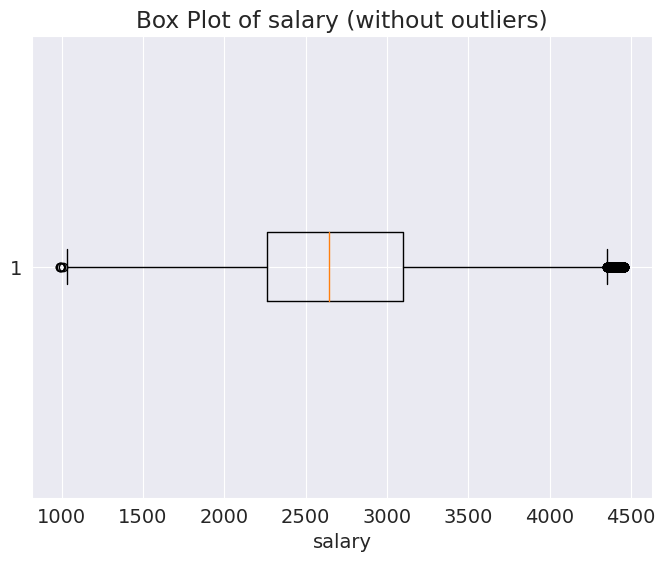

In [45]:
remove_outliers_and_plot(dataset, 'salary')

In [46]:
sum_values = dataset[dataset['salary'] > 4350].shape[0]
print("Sum of target values greater than 50000:", sum_values)

Sum of target values greater than 50000: 3040


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amount          100000 non-null  float64
 1   number_of_defaults   100000 non-null  int64  
 2   outstanding_balance  100000 non-null  float64
 3   interest_rate        100000 non-null  float64
 4   age                  100000 non-null  int64  
 5   salary               100000 non-null  float64
 6   Loan Status          100000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 5.3 MB


# Selecting the input and target features

In [48]:
X = dataset.drop(columns=['Loan Status']).values
y = y = dataset['Loan Status'].values

## Splitting the dataset into the Training set and Test set

In [49]:
X

array([[3.90000000e+04, 0.00000000e+00, 4.86530115e+04, 2.20000000e-01,
        3.70000000e+01, 3.23003887e+03],
       [2.70000000e+04, 2.00000000e+00, 2.87520622e+04, 2.00000000e-01,
        4.30000000e+01, 3.19413910e+03],
       [3.50000000e+04, 1.00000000e+00, 4.47975541e+04, 2.20000000e-01,
        4.30000000e+01, 3.33082666e+03],
       ...,
       [4.80000000e+04, 0.00000000e+00, 3.42662241e+04, 2.30000000e-01,
        4.30000000e+01, 3.53559976e+03],
       [3.60000000e+04, 2.00000000e+00, 7.15460249e+04, 2.20000000e-01,
        4.90000000e+01, 3.08240712e+03],
       [4.60000000e+04, 0.00000000e+00, 4.31411029e+04, 2.10000000e-01,
        4.70000000e+01, 2.67076653e+03]])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [51]:
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('y_train.shape :', y_train.shape)
print('X_test.shape :', X_test.shape)
print('y_test.shape :', y_test.shape)

X.shape : (100000, 6)
X_train.shape : (75000, 6)
y_train.shape : (75000,)
X_test.shape : (25000, 6)
y_test.shape : (25000,)


## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search and K-Fold to determine the right algorithm

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.datasets import make_classification

# Define the parameter distribution for RandomizedSearchCV

In [54]:
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [57]:
# Initialize the RandomizedSearchCV object
rs = RandomizedSearchCV(LogisticRegression(), param_dist, cv=5, return_train_score=True, n_iter=10, random_state=42)

# Fit the model
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, return_train_score=True)

In [58]:
# Convert the results to a DataFrame and display selected columns
results_df = pd.DataFrame(rs.cv_results_)
print(results_df[['param_C', 'param_penalty', 'param_solver', 'param_max_iter', 'mean_test_score', 'mean_train_score']])

  param_C param_penalty param_solver param_max_iter  mean_test_score  \
0    0.01            l1    liblinear            100         0.869080   
1    0.01            l1         saga            500         0.869080   
2      10            l1    liblinear            100         0.870040   
3      10            l1         saga           1000         0.870040   
4     0.1            l1         saga            100         0.869933   
5     100            l2    liblinear            500         0.870040   
6       1            l1         saga           1000         0.870027   
7     100            l1    liblinear            100         0.870040   
8     0.1            l1    liblinear            100         0.869933   
9     100            l1         saga           1000         0.870040   

   mean_train_score  
0          0.869090  
1          0.869047  
2          0.869943  
3          0.869947  
4          0.869887  
5          0.869947  
6          0.869940  
7          0.869950  
8        

In [59]:
# Best parameters
print("Best parameters found: ", rs.best_params_)
print("Best cross-validation score: ", rs.best_score_)

Best parameters found:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 10}
Best cross-validation score:  0.8700399999999998


In [60]:
# Evaluate on test set
best_model = rs.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Test set accuracy:  0.87064


In [61]:
# Perform cross-validation on the best model
cross_val_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", cross_val_scores.mean())

Cross-validation scores:  [0.8694  0.86905 0.87165 0.87045 0.86855]
Mean cross-validation score:  0.86982
